In [1]:
import cv2
import numpy as np

In [4]:
def getAdditions(frame_height, frame_width, row,col,xp,xd,yp,yd):
    if row+yp > frame_height:
        yd += row+yp-frame_height
        yp = frame_height - row
    elif row - yd < 0:
        yp += abs(row-yd)
        yd = row
    if col+xp > frame_width:
        xd += col+xp-frame_width
        xp = frame_width - col
    elif col-xd < 0:
        xp += abs(row-xd)
        xd = col
    return xp,xd,yp,yd

In [39]:
# Load the image
image = cv2.imread(r"C:\Users\shashg\Documents\Frames\3mM L+C 7mM H2o2 b.jpg", cv2.IMREAD_GRAYSCALE)  # Replace "image.jpg" with the path to your image

# Define the neighborhood size
neighborhood_size = 3

# Define a threshold for peak detection
threshold = 100  # Adjust this value according to your image and desired sensitivity

In [40]:
peaks = []
threshhold = 100
rows, cols = (image.shape[0], image.shape[1]) if len(image.shape) != 2 else image.shape
for row in range(1, rows - 1):
    for col in range(1, cols - 1):
        mrow, prow, mcol, pcol = 1,2,1,2
        pixel_value = image[row,col]
        pcol,mcol,prow,mrow = getAdditions(rows, cols, row,col, pcol,mcol,prow,mrow)
        neighborhood = image[row - mrow:row + prow, col - mcol:col + pcol]
        max_in_neighborhood = np.amax(neighborhood)
        if pixel_value >= max_in_neighborhood and pixel_value >= threshhold:
            peaks.append({'value': pixel_value, 'row':row, 'col':col})
            print(f"{pixel_value} appended")

120 appended
120 appended
120 appended
128 appended
128 appended
105 appended
106 appended
136 appended
101 appended
137 appended
135 appended
133 appended
120 appended
121 appended
110 appended
123 appended
141 appended
139 appended
142 appended
140 appended
140 appended
136 appended
120 appended
106 appended
141 appended
142 appended
140 appended
138 appended
129 appended
131 appended
120 appended
104 appended
100 appended
121 appended
141 appended
135 appended
105 appended
136 appended
145 appended
147 appended
145 appended
147 appended
142 appended
141 appended
103 appended
100 appended
109 appended
143 appended
147 appended
147 appended
145 appended
146 appended
146 appended
146 appended
140 appended
140 appended
140 appended
138 appended
105 appended
123 appended
143 appended
147 appended
147 appended
150 appended
150 appended
149 appended
146 appended
143 appended
136 appended
110 appended
111 appended
109 appended
104 appended
102 appended
102 appended
141 appended
149 appended

In [51]:
vals = [peak['value'] for peak in peaks]
maxObjs = [peak for peak in peaks if peak['value'] == max(vals)]
print(maxObjs)

[{'value': 200, 'row': 152, 'col': 281}, {'value': 200, 'row': 153, 'col': 281}, {'value': 200, 'row': 154, 'col': 281}, {'value': 200, 'row': 154, 'col': 282}, {'value': 200, 'row': 155, 'col': 282}, {'value': 200, 'row': 155, 'col': 285}, {'value': 200, 'row': 156, 'col': 285}, {'value': 200, 'row': 158, 'col': 289}, {'value': 200, 'row': 160, 'col': 283}, {'value': 200, 'row': 160, 'col': 284}, {'value': 200, 'row': 160, 'col': 287}, {'value': 200, 'row': 160, 'col': 289}, {'value': 200, 'row': 161, 'col': 285}, {'value': 200, 'row': 161, 'col': 286}, {'value': 200, 'row': 161, 'col': 289}, {'value': 200, 'row': 162, 'col': 289}, {'value': 200, 'row': 162, 'col': 291}]


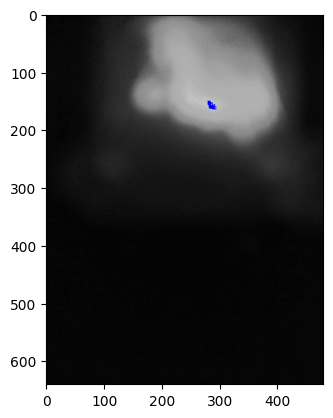

In [52]:
import matplotlib.pyplot as plt

nimg = cv2.cvtColor(image,4)
for obj in maxObjs:
    xp,xd,yp,yd = 2,2,2,2
    row = obj['row']
    col = obj['col']
    xp,xd,yp,yd= getAdditions(rows, cols, row, col, xp,xd,yp,yd)
    cv2.rectangle(nimg, (col-xd,row-yd), (col+xp, row+yp), (255,0,0), 1)

plt.imshow(cv2.cvtColor(nimg, 4))
plt.imsave('C:/Users/shashg/Downloads/test.jpg',nimg)

In [37]:
nimg[217,310]

array([196, 196, 196], dtype=uint8)